This is an analysis of pubmed hits for fMRI yearly since 1990.


In [1]:
from Bio import Entrez


In [2]:
def get_pubmed_query_results(query,entrez_email='poldrack@stanford.edu',retmax=20000):
    print 'searching for',query
    Entrez.email=entrez_email
    handle=Entrez.esearch(db='pubmed',term=query,retmax=retmax)
    record = Entrez.read(handle)
    return record


In [3]:
nhits=[]
years=[]
for year in range(1990,2015):
    query='("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND %d[DP]'%year
    results=get_pubmed_query_results(query)
    nhits.append(len(results['IdList']))
    years.append(year)
    

searching for ("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND 1990[DP]
searching for ("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND 1991[DP]
searching for ("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND 1992[DP]
searching for ("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND 1993[DP]
searching for ("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND 1994[DP]
searching for ("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND 1995[DP]
searching for ("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND 1996[DP]
searching for ("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND 1997[DP]
searching for ("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND 1998[DP]
searching for ("fMRI" OR "functional MRI" OR "functional magnetic resonance imaging") AND 1999[DP]
searching 

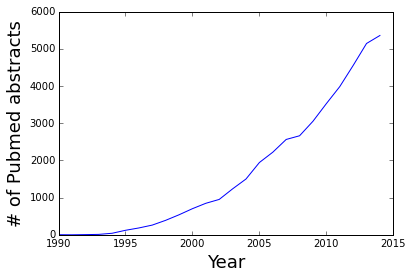

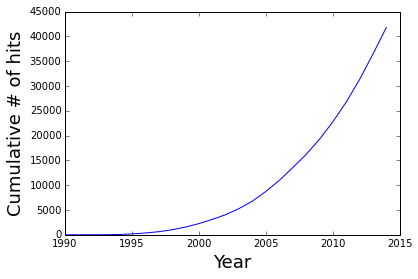

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(years,nhits)
plt.xlabel('Year',fontsize=18)
plt.ylabel('# of Pubmed abstracts',fontsize=18)
plt.savefig('hits_by_year.pdf')

plt.figure()
cumhits=numpy.zeros(len(years))
for i in range(len(years)):
    cumhits[i]=numpy.sum(nhits[:(i+1)])
plt.plot(years,cumhits)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Cumulative # of hits',fontsize=18)
plt.savefig('cumhits_by_year.pdf')


In [12]:
for i in range(len(nhits)):
    print years[i],nhits[i],cumhits[i]

1990 2 2.0
1991 0 2.0
1992 5 7.0
1993 11 18.0
1994 41 59.0
1995 121 180.0
1996 184 364.0
1997 261 625.0
1998 389 1014.0
1999 538 1552.0
2000 702 2254.0
2001 847 3101.0
2002 951 4052.0
2003 1235 5287.0
2004 1500 6787.0
2005 1943 8730.0
2006 2220 10950.0
2007 2563 13513.0
2008 2662 16175.0
2009 3052 19227.0
2010 3526 22753.0
2011 3983 26736.0
2012 4551 31287.0
2013 5143 36430.0
2014 5358 41788.0


In [6]:
import numpy
numpy.sum(nhits)

41788

In [34]:
popt, pcov =  curve_fit(expfunc, np.array(years), np.array(cumhits),p0=(1, 100, 1))
expfunc(np.array(years), *popt)

array([ 10115.72003689,  10115.72003689,  10115.72003689,  10115.72003689,
        10115.72003689,  10115.72003689,  10115.72003689,  10115.72003689,
        10115.72003689,  10115.72003689,  10115.72003689,  10115.72003689,
        10115.72003689,  10115.72003689,  10115.72003689,  10115.72003689,
        10115.72003689,  10115.72003689,  10115.72003689,  10115.72003689,
        10115.72003689,  10115.72003689,  10115.72003689,  10115.72003689,
        10115.72003689])

ValueError: x and y must have same first dimension

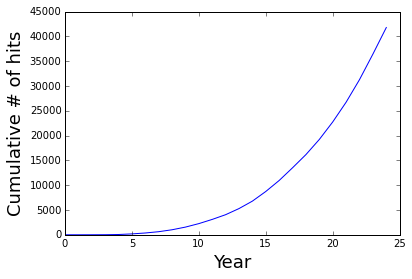

In [27]:
def expfunc(x, a, b, c):
    return a * np.exp(-b * x) + c
import numpy as np
from scipy.optimize import curve_fit

popt, pcov =  curve_fit(expfunc, range(len(years)), np.array(cumhits),p0=(1, 1e-6, 1))
plt.plot(range(len(years)),cumhits)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Cumulative # of hits',fontsize=18)

plt.plot(range(len(years)), expfunc(range(len(years)), *popt), 'r-', label="Fitted Curve")

In [17]:
popt


array([  1.00000000e+00,   1.00000000e+00,   1.01157199e+04])

In [18]:
pcov

array([[ inf,  inf,  inf],
       [ inf,  inf,  inf],
       [ inf,  inf,  inf]])